In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Combined_Models_Data (4).xlsx to Combined_Models_Data (4) (5).xlsx


['Obsereved_Data', 'Predicted_Tmax', 'Predicted_Tmin', 'Predicted_Pr']
Index(['Year', 'Month', 'Station ID', 'Station Name', 'Latitude', 'Longitude',
       'Predicted_Tmax', 'Model'],
      dtype='object')


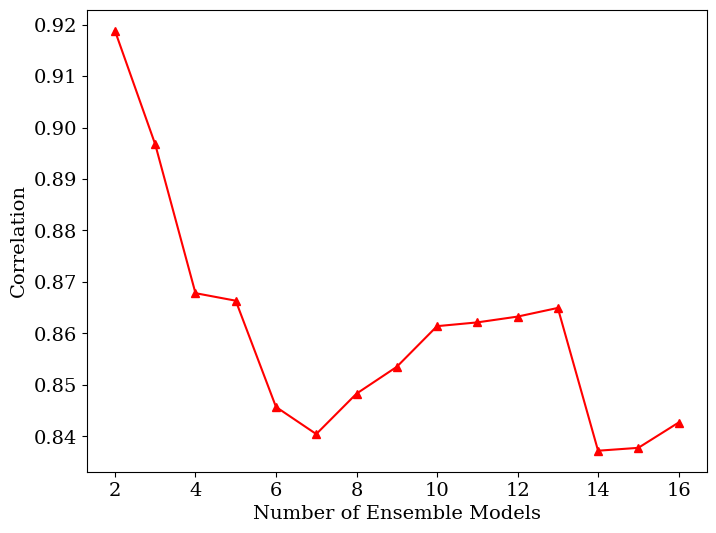

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

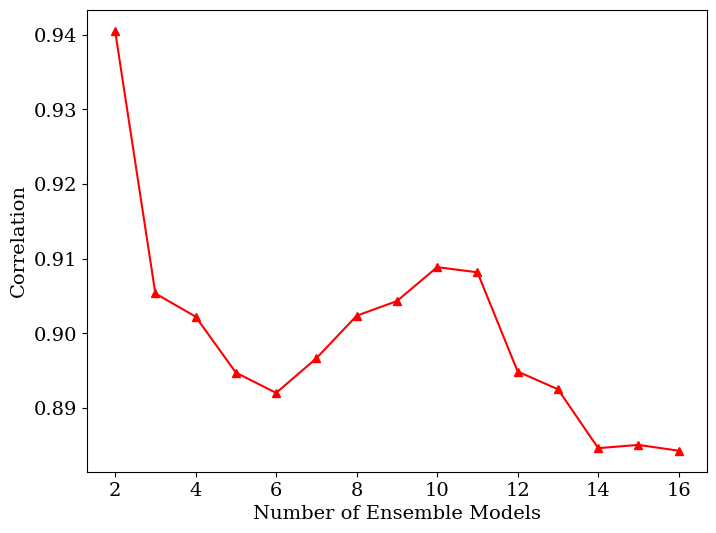

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

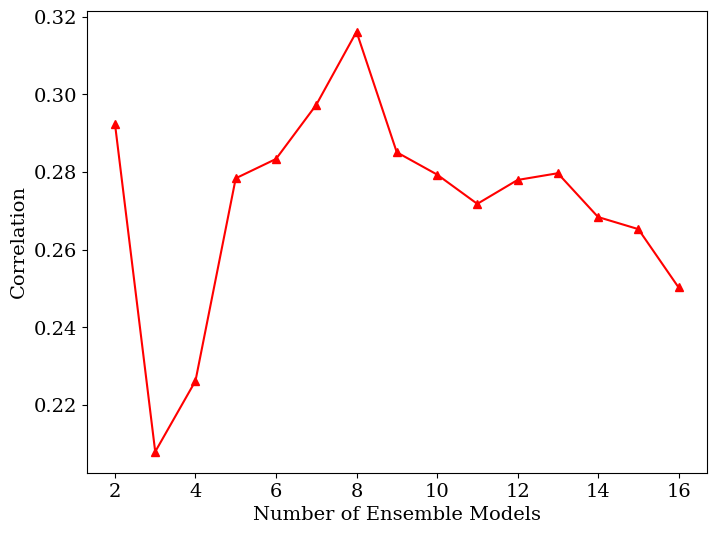

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set font globally to DejaVu Serif
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 14  # You can adjust the size as needed


# Load the observed data
file_path = 'Combined_Models_Data (4) (5).xlsx'  # Update with your actual file path
sheet_names = pd.ExcelFile(file_path).sheet_names
print(sheet_names)

observed_df = pd.read_excel(file_path, sheet_name='Obsereved_Data')  # Update the sheet name if necessary
# Load the specific predicted data
combined_df = pd.read_excel(file_path, sheet_name='Predicted_Tmax')

# Print column names to check if 'Model' exists
print(combined_df.columns)


# Standardize station names in the observed data
observed_df['Station Name'] = observed_df['Station Name'].str.upper().str.strip()

# Filter observed data to the 2015-2023 period
observed_filtered = observed_df[(observed_df['Year'] >= 2015) & (observed_df['Year'] <= 2023)]

# Function to calculate correlations and plot for a specific variable
def calculate_and_plot_correlations(sheet_name, predicted_column, observed_column, output_filename):
    # Load the specific predicted data
    combined_df = pd.read_excel(file_path, sheet_name=sheet_name)

    # Standardize station names in the predicted data
    combined_df['Station Name'] = combined_df['Station Name'].str.upper().str.strip()

    # Merge the observed and predicted data on Year, Month, and Station Name
    merged_df = pd.merge(observed_filtered, combined_df, on=['Year', 'Month', 'Station Name'])

    # Initialize lists to store average correlations for each number of ensemble models
    average_correlations = []

    # Iterate over the number of ensemble models
    models = merged_df['Model'].unique()

    for num_models in range(2, len(models) + 1):
        station_correlations = []

        # Iterate over each station
        for station in merged_df['Station Name'].unique():
            # Extract observed and predicted data for the station
            observed_station_data = merged_df[(merged_df['Station Name'] == station) & (merged_df['Model'].isin(models[:num_models]))].sort_values(by=['Year', 'Month'])[observed_column]
            predicted_station_data = merged_df[(merged_df['Station Name'] == station) & (merged_df['Model'].isin(models[:num_models]))].sort_values(by=['Year', 'Month'])[predicted_column]

            # Ensure the lengths match after merging
            if len(observed_station_data) == len(predicted_station_data):
                # Calculate the correlation coefficient
                correlation = np.corrcoef(predicted_station_data, observed_station_data)[0, 1]
                # Only keep positive correlations
                if correlation > 0:
                    station_correlations.append(correlation)
            else:
                print(f"Data length mismatch for station {station}. Skipping this station.")

        # Calculate the average correlation across all stations
        average_correlation = np.nanmean(station_correlations)
        average_correlations.append(average_correlation)

    # Plot the results with no grid and a blank background
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, len(models) + 1), average_correlations, marker='^', color='red')
    plt.xlabel('Number of Ensemble Models')
    plt.ylabel('Correlation')
    plt.title(f'')
    plt.grid(False)  # Remove grid


    # Save the plot as a high-resolution JPEG image
    plt.savefig(output_filename, format='jpg', dpi=300)  # 300 dpi for high resolution
    plt.show()

    # Download the saved image
    files.download(output_filename)

# Calculate, plot, save, and download correlations for Tmax
calculate_and_plot_correlations(sheet_name='Predicted_Tmax', predicted_column='Predicted_Tmax', observed_column='Observed_Tmax', output_filename='Correlation_Tmax.jpg')

# Calculate, plot, save, and download correlations for Tmin
calculate_and_plot_correlations(sheet_name='Predicted_Tmin', predicted_column='Predicted_Tmin', observed_column='Observed_Tmin', output_filename='Correlation_Tmin.jpg')

# Calculate, plot, save, and download correlations for Pr
calculate_and_plot_correlations(sheet_name='Predicted_Pr', predicted_column='Predicted_Pr', observed_column='Observed_Pr', output_filename='Correlation_Pr.jpg')